#### Python Code to Create Stratified Sample

***Import the necessary Lib.***

In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns


In [15]:
# Load your dataset
df = pd.read_csv('C:/Users/5530/OneDrive/Desktop/Real_State_Housing_Mumbai/Creation & Handling of CSV files/CSV_Files/Mumbai_Housing_Real_Estate.csv')

# Show case the Values 
df.head()

,property_id,locality,property_type,bhk,size_sqft,price_lakhs,rent_monthly,availability,possession_year,furnished_status,posted_on
0,1,Malad,Studio,1,1292.29,136.95,55665.0,Ready to move,2025,Unfurnished,2024-04-23 00:00:00
1,2,Powai,Apartment,2,894.23,112.35,41791.0,Ready to move,2025,Furnished,2024-04-08 00:00:00
2,3,Goregaon,Apartment,1,915.87,190.00,29550.0,Ready to move,2025,Semi-Furnished,2024-06-26 00:00:00
3,4,Borivali,Studio,3,889.52,126.44,50435.0,Ready to move,2025,Furnished,2024-07-07 00:00:00
4,5,Malad,Apartment,2,1019.09,260.05,40941.0,Ready to move,2025,Unfurnished,2024-09-26 00:00:00


***Make sure no NAN values present in it***

In [16]:
#drop the missing value for the columns 
df_str = df.dropna(subset=['locality','property_type'])

***Combine the Values of Column of 'Locality' & 'property_type'***

In [17]:
# Create a new column combining Locality and BHK for stratification
df_str['Strat'] = df_str['locality'].astype(str) + "-" + df_str['property_type'].astype(str)

***Stratifie the Data***

In [18]:
# Stratified sample: 30% of the data
_, stratified_sample = train_test_split(
    df_str, 
    test_size=0.3, 
    stratify=df_str['Strat'],
    random_state=42
)

***Creation of the CSV file***

In [ ]:
# Drop the helper 'Strat' column
stratified_sample.drop(columns=['Strat'], inplace=True)

# Save the stratified sample
stratified_sample.to_csv("stratified_sample_loc_Pro.csv", index=False)

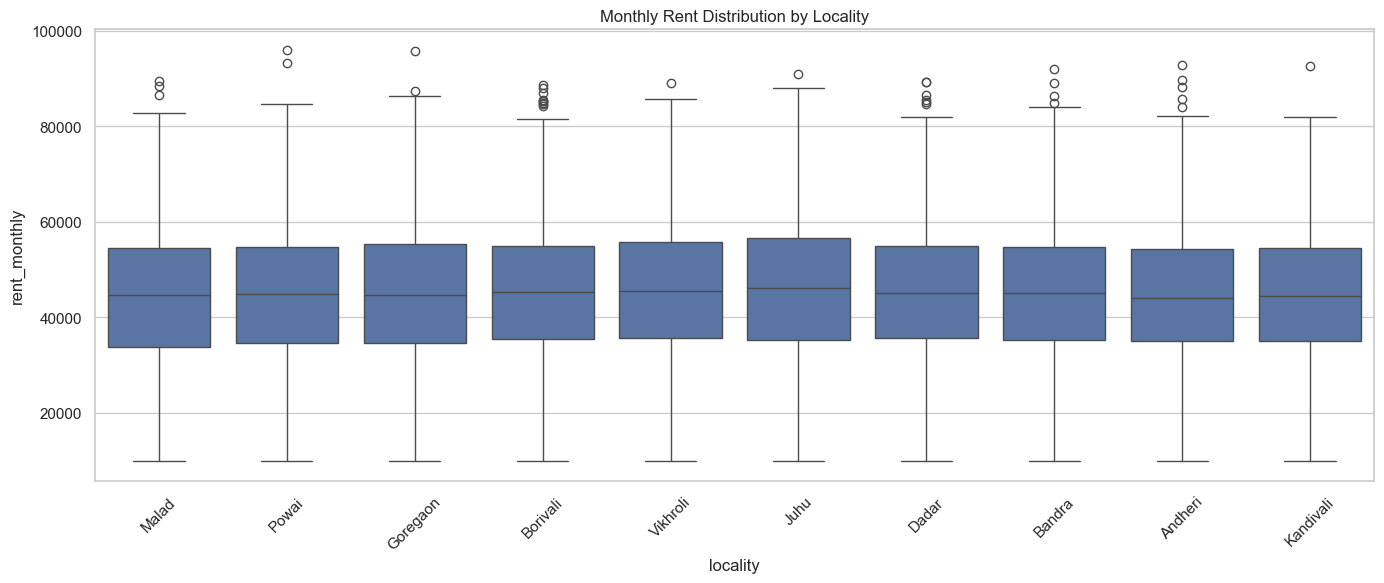

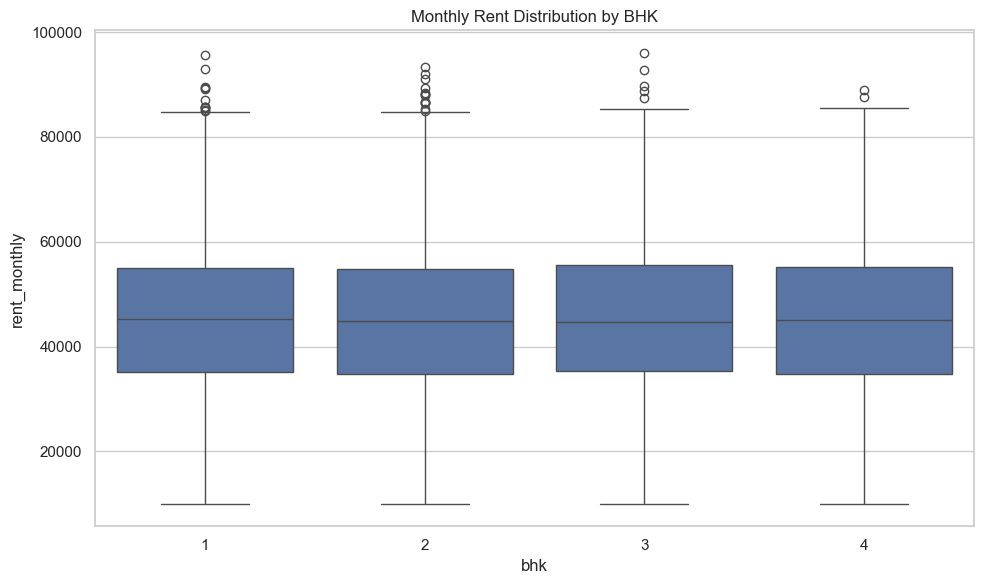

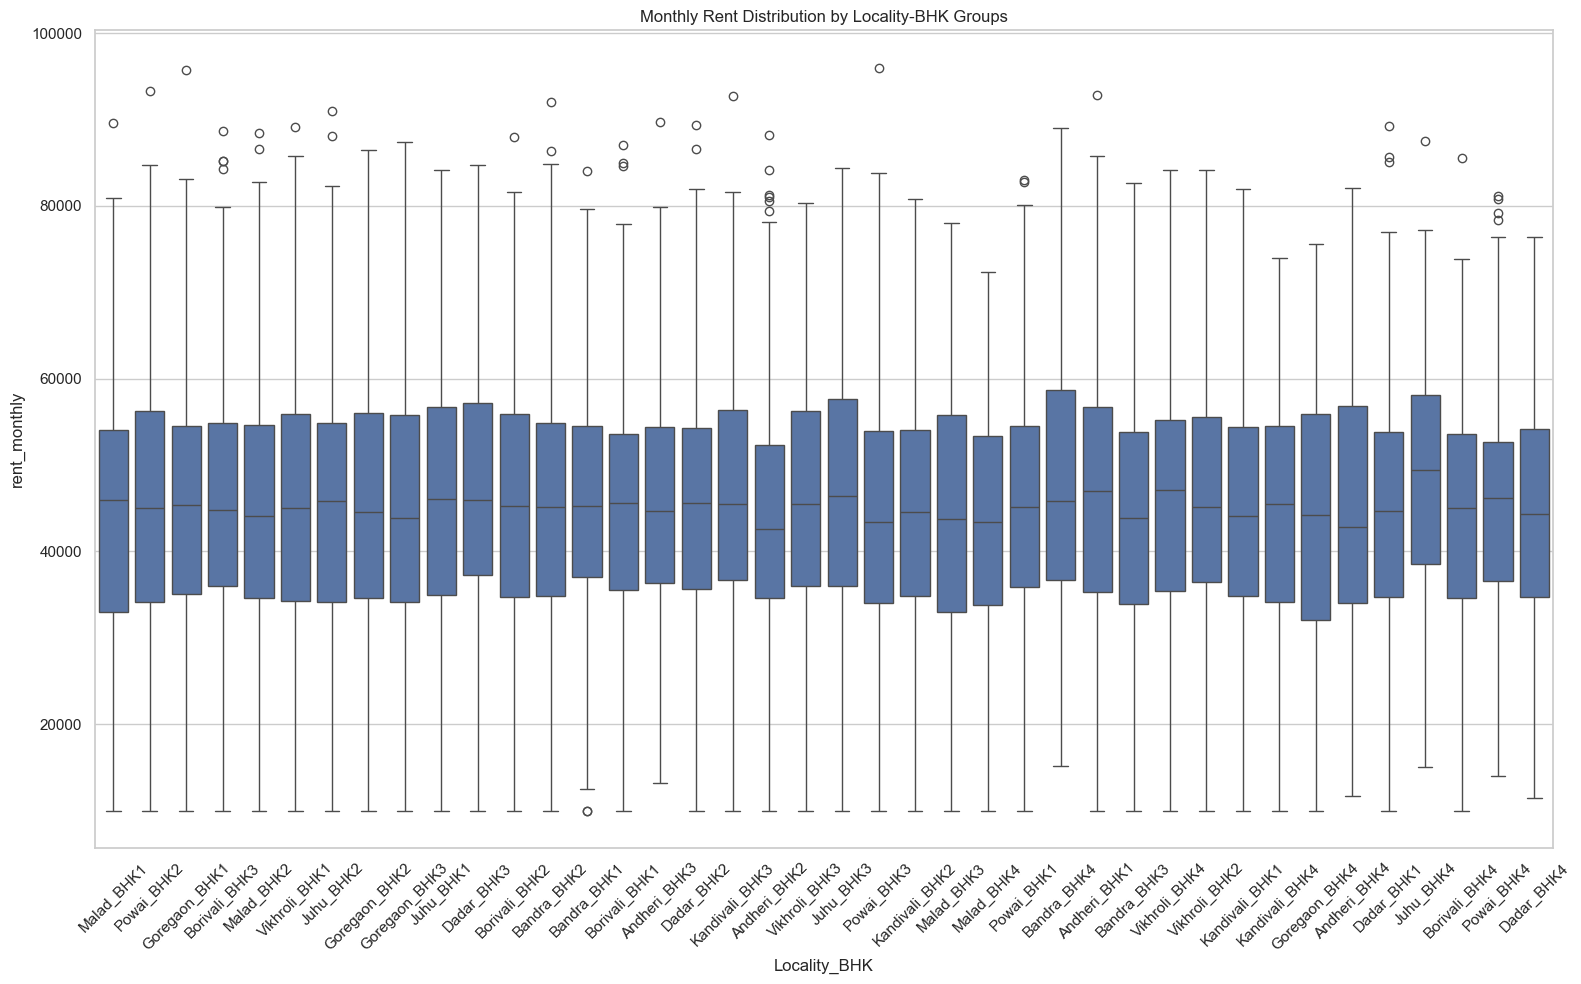

In [26]:
# Set style
sns.set(style="whitegrid")

# 1. Boxplot: Monthly Rent vs Locality
plt.figure(figsize=(14, 6))
sns.boxplot(data=df, x='locality', y='rent_monthly')
plt.xticks(rotation=45)
plt.title("Monthly Rent Distribution by Locality")
plt.tight_layout()
plt.show()

# 2️. Boxplot: Monthly Rent vs BHK
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='bhk', y='rent_monthly')
plt.title("Monthly Rent Distribution by BHK")
plt.tight_layout()
plt.show()

# 3️. Boxplot: Monthly Rent vs (Locality, BHK)
df['Locality_BHK'] = df['locality'].astype(str) + "_BHK" + df['bhk'].astype(str)
plt.figure(figsize=(16, 10))
sns.boxplot(data=df, x='Locality_BHK', y='rent_monthly')
plt.xticks(rotation=45)
plt.title("Monthly Rent Distribution by Locality-BHK Groups")
plt.tight_layout()
plt.show()
